In [1]:
import glob
import os
import json
import pickle
import yaml

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import utils_farouk as utils
plt.rcParams.update({"font.size": 20})

/opt/anaconda3/envs/coffea-env/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
! ls ../Mar26_2017

DYJetsToLL_Pt-100To250                 QCD_Pt_470to600
DYJetsToLL_Pt-250To400                 QCD_Pt_600to800
DYJetsToLL_Pt-400To650                 QCD_Pt_800to1000
DYJetsToLL_Pt-50To100                  TTTo2L2Nu
DYJetsToLL_Pt-650ToInf                 TTToHadronic
GluGluHToWW_Pt-200ToInf_M-125          TTToSemiLeptonic
HWminusJ_HToWW_M-125                   VBFHToWWToLNuQQ_M-125_withDipoleRecoil
HWplusJ_HToWW_M-125                    WJetsToLNu_HT-100To200
HZJ_HToWW_M-125                        WJetsToLNu_HT-1200To2500
QCD_Pt_1000to1400                      WJetsToLNu_HT-200To400
QCD_Pt_1400to1800                      WJetsToLNu_HT-2500ToInf
QCD_Pt_170to300                        WJetsToLNu_HT-400To600
QCD_Pt_1800to2400                      WJetsToLNu_HT-600To800
QCD_Pt_2400to3200                      WJetsToLNu_HT-70To100
QCD_Pt_300to470                        WJetsToLNu_HT-800To1200
QCD_Pt_3200toInf                       ttHToNonbb_M125


In [4]:
# # counts number of events for a given sample after skimming
# samples_dir = "../Mar23_2017/"
# for sample in os.listdir(samples_dir):
# #     if sample != "SingleMuon_Run2017E":
# #         continue
#     out_files = f"{samples_dir}/{sample}/outfiles/"
#     parquet_files = glob.glob(f"{out_files}/*_{ch}.parquet")
    
#     if not parquet_files:
#         print(f"No parquet file for {sample}")
#         continue                

#     data = pd.read_parquet(parquet_files)
#     not_empty = len(data) > 0

#     print(f"Finding {len(data)} events for {sample}")

# Read parquets
- loads parquet dataframes and combine different pt-bins per sample
- saves the combined dataframe under `events[ch][sample]`

In [5]:
presel = {
    "mu": {
#         ### already applied in processor
#         "isolation": "( ( (lep_pt < 55) & (lep_isolation<0.15)) |  (lep_pt >= 55) )",
#         "mini-isolation": "( (lep_pt < 55) |  ( (lep_misolation < 0.2) & (lep_pt >= 55) ) )",
        
        ### checks
#         "lep_fj_dr": "( ( lep_fj_dr>0.03) )"        
#         "bjet_ophem": "( (fj_bjets_ophem < 0.3040) )",
        
    },
    "ele": {
#         ### already applied in processor
#         "isolation": "( ( (lep_pt < 120) & (lep_isolation<0.15)) |  (lep_pt >= 120) )",    
        
        ### checks
#         "lep_fj_dr": "( ( lep_fj_dr>0.03) )"                
#         "bjet_ophem": "( (fj_bjets_ophem < 0.3040) )",  
    }    
}

In [237]:
channels = ["mu", "ele"]
samples_dir = "../Mar26_2017"

samples = [
    "HWW", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
#     "WZQQ",
    "TTbar",
#     "SingleTop",
#     "Diboson",
]

In [7]:
# events_dict = utils.event_skimmer(channels, samples_dir, samples, presel, columns, add_inclusive_score=True)
events_dict = utils.event_skimmer(channels, samples_dir, samples, presel, ["fj_pt", "weight_pileup"], add_inclusive_score=True)

Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
---> Done with accumulating event weights.
Will fill the WJetsLNu dataframe with the remaining 37101 events
tot event weight 61943.950425697294 

Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
---> Done with accumulating event weights.
Will fill the DYJets dataframe with the remaining 107935 events
tot event weight 1054.4924284150154 

Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the VBF dataframe with the remaining 1509 events
tot event weight 74.07373021147936 

Find

---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the QCD dataframe with the remaining 2409 events
tot event weight 134.07464581382197 

Finding WJetsToLNu_HT-400To600 samples and should combine them under WJetsLNu
---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
---> Done with accumulating event weights.
Will fill the WJetsLNu dataframe with the remaining 204390 events
tot event weight 97494.7684189082 

Finding QCD_Pt_470to600 samples and should combine them under QCD
---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the QCD dataframe with the remaining 1990 events
tot event weight 2122.7524365293493 

Finding HZJ_HToWW_M-125 samples and should combine them

Finding QCD_Pt_1000to1400 samples and should combine them under QCD
---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the QCD dataframe with the remaining 5525 events
tot event weight 87.44538075340762 

Finding QCD_Pt_600to800 samples and should combine them under QCD
---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the QCD dataframe with the remaining 5193 events
tot event weight 1635.496718320136 

Finding QCD_Pt_300to470 samples and should combine them under QCD
---> Applying preselection.
---> Done with preselection.
---> Accumulating event weights.
weight_vjets_nominal weight is not stored in parquet
---> Done with accumulating event weights.
Will fill the QCD dataframe with the remaining 382

In [11]:
events_dict.keys()

dict_keys(['mu', 'ele'])

In [12]:
events_dict["mu"].keys()

dict_keys(['WJetsLNu', 'DYJets', 'VBF', 'VH', 'TTbar', 'HWW', 'QCD', 'ttH'])

# Plot histograms

In [13]:
label_by_ch = {
    "mu": "Muon",
    "ele": "Electron"
}

## 1d-hists

In [101]:
samples_to_plot = [
    "HWW", 
    "VH",
    "VBF",
    "ttH",
#     "QCD",
#     "DYJets",
#     "WJetsLNu",
#     "WZQQ",
#     "TTbar",
#     "SingleTop",
#     "Diboson",
]

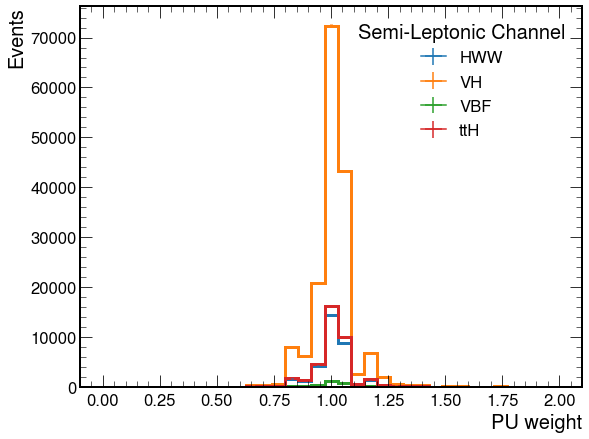

In [105]:
plt.rcParams.update({"font.size": 20})

channels = ["mu", "ele"]
# channels = ["mu"]

fig, ax = plt.subplots(figsize=(9, 7))
for sample in samples_to_plot:
    
    h = hist2.Hist(
        hist2.axis.Regular(35, 0, 2, name="var", label=r"PU weight")#, overflow=True),
    )
    
    for ch in channels:
        
        df = events_dict[ch][sample]
        
        # remove strange PU
        strange_PU = df["weight_pileup"]>2
        df = df[~strange_PU]
        
        h.fill(
            var=df["weight_pileup"],
#             weight=events_dict[ch][sample]["event_weight"]
        )

    hep.histplot(
        h,
        ax=ax,
        label=f"{sample}",
        linewidth=3,
#         density=True
    )
# ax.set_yscale("log")
if len(channels)==2:
    ax.legend(title=f"Semi-Leptonic Channel")
else:
    ax.legend(title=f"{label_by_ch[ch]} Channel")
ax.set_ylabel("Events");

# PU_weight>2 unqiue events

In [113]:
print("HWW:")
weight_pileup = events_dict["mu"]["HWW"]["weight_pileup"]
print(f"Muon channel: {weight_pileup[(weight_pileup>2)].unique()}")
weight_pileup = events_dict["ele"]["HWW"]["weight_pileup"]
print(f"Electron channel: {weight_pileup[(weight_pileup>2)].unique()}")

HWW:
Muon channel: [ 16.47348646   2.49737218   3.51037043   3.60484639 159.55129944
   5.54615773  30.20828845]
Electron channel: [  2.49737218  30.20828845   5.54615773  16.47348646   3.60484639
   3.51037043 159.55129944]


In [93]:
print("VH:")
weight_pileup = events_dict["mu"]["VH"]["weight_pileup"]
print(f"Muon channel: {weight_pileup[(weight_pileup>2)].unique()}")
weight_pileup = events_dict["ele"]["VH"]["weight_pileup"]
print(f"Electron channel: {weight_pileup[(weight_pileup>2)].unique()}")

VH:
Muon channel: [  2.49737218   3.51037043   3.60484639   5.54615773  16.47348646
  30.20828845 159.55129944]
Electron channel: [159.55129944   3.60484639  16.47348646   2.49737218   5.54615773
   3.51037043  30.20828845]


In [94]:
print("ttH:")
weight_pileup = events_dict["mu"]["ttH"]["weight_pileup"]
print(f"Muon channel: {weight_pileup[(weight_pileup>2)].unique()}")
weight_pileup = events_dict["ele"]["ttH"]["weight_pileup"]
print(f"Electron channel: {weight_pileup[(weight_pileup>2)].unique()}")

ttH:
Muon channel: [  2.49737218   3.51037043   3.60484639 159.55129944  16.47348646
   5.54615773]
Electron channel: [  3.51037043  16.47348646   5.54615773   2.49737218  30.20828845
   3.60484639 159.55129944]


In [95]:
print("VBF:")
weight_pileup = events_dict["mu"]["VBF"]["weight_pileup"]
print(f"Muon channel: {weight_pileup[(weight_pileup>2)].unique()}")
weight_pileup = events_dict["ele"]["VBF"]["weight_pileup"]
print(f"Electron channel: {weight_pileup[(weight_pileup>2)].unique()}")

VBF:
Muon channel: [16.47348646  5.54615773  2.49737218]
Electron channel: []


In [106]:
print("HWW:")
weight_pileup = events_dict["mu"]["HWW"]["weight_pileup"]
print(f"Muon channel: {weight_pileup[(weight_pileup>2)].unique()}")
weight_pileup = events_dict["ele"]["HWW"]["weight_pileup"]
print(f"Electron channel: {weight_pileup[(weight_pileup>2)].unique()}")

HWW:
Muon channel: [ 16.47348646   2.49737218   3.51037043   3.60484639 159.55129944
   5.54615773  30.20828845]
Electron channel: [  2.49737218  30.20828845   5.54615773  16.47348646   3.60484639
   3.51037043 159.55129944]


# PU_weight>150

In [126]:
print("HWW:")
weight_pileup = events_dict["mu"]["HWW"]["weight_pileup"]
print(f"Muon channel:")
events_dict["mu"]["HWW"][(weight_pileup>150)]

HWW:
Muon channel:


,fj_pt,weight_pileup,event_weight,inclusive_score
5330,208.750,159.551299,1.287828,0.848159
7673,581.500,159.551299,1.287995,0.998584
12709,225.875,159.551299,1.275652,0.964512
13503,225.125,159.551299,1.285840,0.960801
14675,362.500,159.551299,1.333763,0.944955


In [130]:
print("HWW:")
weight_pileup = events_dict["ele"]["HWW"]["weight_pileup"]
print(f"Electron channel:")
events_dict["ele"]["HWW"][(weight_pileup>150)]

HWW:
Electron channel:


,fj_pt,weight_pileup,event_weight,inclusive_score
6011,300.5,159.551299,1.293271,0.600842


In [129]:
print("VH:")
weight_pileup = events_dict["mu"]["VH"]["weight_pileup"]
print(f"Muon channel:")
events_dict["mu"]["VH"][(weight_pileup>150)]

VH:
Muon channel:


,fj_pt,weight_pileup,event_weight,inclusive_score
12171,221.125,159.551299,0.112175,0.908784
17432,277.000,159.551299,0.112020,0.360441
5072,233.125,159.551299,0.186225,0.510054
13205,324.750,159.551299,0.177567,0.945212
15983,239.750,159.551299,0.180314,0.546786
22239,301.750,159.551299,0.180401,0.790215
24000,201.875,159.551299,0.177971,0.014350
1154,233.625,159.551299,0.101325,0.992535
5086,213.000,159.551299,0.097600,0.898714
5138,241.750,159.551299,0.097600,0.983894


In [131]:
print("VH:")
weight_pileup = events_dict["ele"]["VH"]["weight_pileup"]
print(f"Electron channel:")
events_dict["ele"]["VH"][(weight_pileup>150)]

VH:
Electron channel:


,fj_pt,weight_pileup,event_weight,inclusive_score
417,285.750,159.551299,0.113812,0.921498
9047,200.125,159.551299,0.113182,0.757598
18317,407.750,159.551299,0.102317,0.910947
2309,255.375,159.551299,0.169964,0.113879
2484,412.000,159.551299,0.175246,0.961705
3620,290.750,159.551299,0.142868,0.639211
3744,398.750,159.551299,-0.178217,0.812031
18124,243.000,159.551299,0.183665,0.122852
23095,202.500,159.551299,0.176014,0.471990
2562,293.750,159.551299,0.097330,0.054552


In [135]:
print("ttH:")
weight_pileup = events_dict["mu"]["ttH"]["weight_pileup"]
print(f"Muon channel:")
events_dict["mu"]["ttH"][(weight_pileup>150)]

ttH:
Muon channel:


,fj_pt,weight_pileup,event_weight,inclusive_score
3724,202.125,159.551299,0.581579,0.996560
5376,291.500,159.551299,0.601421,0.146227
14153,218.500,159.551299,0.583019,0.969640


In [136]:
print("ttH:")
weight_pileup = events_dict["ele"]["ttH"]["weight_pileup"]
print(f"Electron channel:")
events_dict["ele"]["ttH"][(weight_pileup>150)]

ttH:
Electron channel:


,fj_pt,weight_pileup,event_weight,inclusive_score
8951,328.50,159.551299,0.528129,0.718490
16183,201.25,159.551299,0.588096,0.436653
16195,256.25,159.551299,0.556751,0.000168


# Num

In [149]:
print("HWW - Electron channel:")
print(f'PU_weight>15: {sum(events_dict["ele"]["HWW"]["weight_pileup"]>15)}')
print(f'PU_weight>150: {sum(events_dict["ele"]["HWW"]["weight_pileup"]>150)} \n')
print("HWW - Muon channel:")
print(f'PU_weight>15: {sum(events_dict["mu"]["HWW"]["weight_pileup"]>15)}')
print(f'PU_weight>150: {sum(events_dict["mu"]["HWW"]["weight_pileup"]>150)}')
print("---------------------")
print("VH - Electron channel:")
print(f'PU_weight>15: {sum(events_dict["ele"]["VH"]["weight_pileup"]>15)}')
print(f'PU_weight>150: {sum(events_dict["ele"]["VH"]["weight_pileup"]>150)} \n')
print("VH - Muon channel:")
print(f'PU_weight>15: {sum(events_dict["mu"]["VH"]["weight_pileup"]>15)}')
print(f'PU_weight>150: {sum(events_dict["mu"]["VH"]["weight_pileup"]>150)}')
print("---------------------")
print("ttH - Electron channel:")
print(f'PU_weight>15: {sum(events_dict["ele"]["ttH"]["weight_pileup"]>15)}')
print(f'PU_weight>150: {sum(events_dict["ele"]["ttH"]["weight_pileup"]>150)} \n')
print("ttH - Muon channel:")
print(f'PU_weight>15: {sum(events_dict["mu"]["ttH"]["weight_pileup"]>15)}')
print(f'PU_weight>150: {sum(events_dict["mu"]["ttH"]["weight_pileup"]>150)}')

HWW - Electron channel:
PU_weight>15: 18
PU_weight>150: 1 

HWW - Muon channel:
PU_weight>15: 13
PU_weight>150: 5
---------------------
VH - Electron channel:
PU_weight>15: 60
PU_weight>150: 16 

VH - Muon channel:
PU_weight>15: 50
PU_weight>150: 15
---------------------
ttH - Electron channel:
PU_weight>15: 19
PU_weight>150: 3 

ttH - Muon channel:
PU_weight>15: 5
PU_weight>150: 3


# Background

In [196]:
# sample = "QCD"
# print(f"{sample} - Electron channel:")
# print(f'PU_weight>15: {sum(events_dict["ele"][sample]["weight_pileup"]>15)}')
# print(f'PU_weight>150: {sum(events_dict["ele"][sample]["weight_pileup"]>150)} \n')
# print(f"{sample} - Muon channel:")
# print(f'PU_weight>15: {sum(events_dict["mu"][sample]["weight_pileup"]>15)}')
# print(f'PU_weight>150: {sum(events_dict["mu"][sample]["weight_pileup"]>150)}')
# print("---------------------")
# sample = "TTbar"
# print(f"{sample} - Electron channel:")
# print(f'PU_weight>15: {sum(events_dict["ele"][sample]["weight_pileup"]>15)}')
# print(f'PU_weight>150: {sum(events_dict["ele"][sample]["weight_pileup"]>150)} \n')
# print(f"{sample} - Muon channel:")
# print(f'PU_weight>15: {sum(events_dict["mu"][sample]["weight_pileup"]>15)}')
# print(f'PU_weight>150: {sum(events_dict["mu"][sample]["weight_pileup"]>150)}')
# print("---------------------")
# sample = "WJetsLNu"
# print(f"{sample} - Electron channel:")
# print(f'PU_weight>15: {sum(events_dict["ele"][sample]["weight_pileup"]>15)}')
# print(f'PU_weight>150: {sum(events_dict["ele"][sample]["weight_pileup"]>150)} \n')
# print(f"{sample} - Muon channel:")
# print(f'PU_weight>15: {sum(events_dict["mu"][sample]["weight_pileup"]>12)}')

print(f'PU_weight>10: {sum(events_dict["mu"][sample]["weight_pileup"]>10)}')

print(f'PU_weight>16: {sum(events_dict["mu"][sample]["weight_pileup"]>25)}')
print(f'PU_weight>30: {sum(events_dict["mu"][sample]["weight_pileup"]>30)}')
print(f'PU_weight>31: {sum(events_dict["mu"][sample]["weight_pileup"]>31)}')

print(f'PU_weight>159: {sum(events_dict["mu"][sample]["weight_pileup"]>159)}')
print(f'PU_weight>160: {sum(events_dict["mu"][sample]["weight_pileup"]>160)}')

PU_weight>10: 1233
PU_weight>16: 712
PU_weight>30: 712
PU_weight>31: 308
PU_weight>159: 308
PU_weight>160: 0


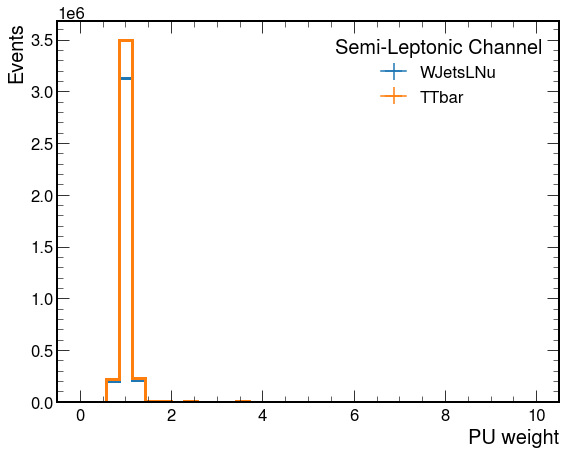

In [167]:
samples_to_plot = [
#     "HWW", 
#     "VH",
#     "VBF",
#     "ttH",
#     "QCD",
#     "DYJets",
    "WJetsLNu",
    "TTbar",
#     "SingleTop",
#     "Diboson",
]

plt.rcParams.update({"font.size": 20})

channels = ["mu", "ele"]
# channels = ["mu"]

fig, ax = plt.subplots(figsize=(9, 7))
for sample in samples_to_plot:
    
    h = hist2.Hist(
        hist2.axis.Regular(35, 0, 10, name="var", label=r"PU weight")#, overflow=True),
    )
    
    for ch in channels:
        
        df = events_dict[ch][sample]
        # remove strange PU
#         strange_PU = df["weight_pileup"]>2
#         df = df[~strange_PU]
        
        h.fill(
            var=df["weight_pileup"],
#             weight=events_dict[ch][sample]["event_weight"]
        )

    hep.histplot(
        h,
        ax=ax,
        label=f"{sample}",
        linewidth=3,
#         density=True
    )
# ax.set_yscale("log")
if len(channels)==2:
    ax.legend(title=f"Semi-Leptonic Channel")
else:
    ax.legend(title=f"{label_by_ch[ch]} Channel")
ax.set_ylabel("Events");

# All counts

In [238]:
print("PU weight values > 6 | counts")
for sample in samples:
    d = events_dict["mu"][sample]["weight_pileup"]
    print(f"{sample}: {np.unique(d[d>6], return_counts=True)}")

PU weight values > 6 | counts
HWW: (array([ 16.47348646,  30.20828845, 159.55129944]), array([7, 1, 5]))
VH: (array([ 16.47348646,  30.20828845, 159.55129944]), array([25, 10, 15]))
VBF: (array([16.47348646]), array([1]))
ttH: (array([ 16.47348646, 159.55129944]), array([2, 3]))
QCD: (array([ 16.47348646,  30.20828845, 159.55129944]), array([4, 4, 5]))
DYJets: (array([ 16.47348646,  30.20828845, 159.55129944]), array([776, 606, 456]))
WJetsLNu: (array([ 16.47348646,  30.20828845, 159.55129944]), array([521, 404, 308]))
TTbar: (array([ 16.47348646,  30.20828845, 159.55129944]), array([566, 393, 292]))
